In [1]:
########### STAGGERED ANIMATION: EXPERIMENT 2 ############
#
# This script runs planned analysis 
#  of the results for experiment 2
#
##########################################################



#------------------ LIBRARIES --------------------------#
install.packages(c("ggplot2","boot", "gridExtra"))
library(ggplot2)
library(boot)
library(gridExtra)
#-------------------------------------------------------#



The downloaded binary packages are in
	/var/folders/9s/1kyml98x6f7854mqs56lxrb00000gq/T//RtmpZbB9KK/downloaded_packages


In [2]:

#------------------ NAMES AND LABELS -------------------#
  ### short names for columns
crowd <- 'diff_crowding'
incrowd <- 'diff_innercrowding'
deform <- 'diff_deformation'
norm_error <- 'normalized_error'
pLabeled <- 'correct_targets_percent'
pClicked <- 'common_targets_percent'
labeled <- 'correct_targets'
clicked <- 'common_targets'
mislabeled <- 'targets_switch'


  ### text labels for charts
lDeform <- 'Deformation'
lIncrowd <- 'Inner crowding'
lCrowd <- 'Crowding'
lNorm_error <- 'Normalized error'
lPLabeled <- 'Accuracy (correct labeled / total targets)'
lPClicked <- 'Accuracy click (correct clicked / total targets)'
lPMislabeled <- 'Mislabeling (mislabeled / total targets)'
lPMislabeledPerClicks <- 'Mislabeling (mislabeled / correct clicked)'
lTaskA <- 'No ID'
lTaskB <- 'ID'
#-------------------------------------------------------#

In [8]:
#--------------- USEFUL FUNCTIONS ----------------------#

##### get subset corresponding to a difficulty level 'level' of a measure 'measure'
getSubsetByDifficulty <- function(x, measure, level)  {
    result <- x[x[,measure]==level,]
    
    if (length(result[,1]) != NB_PARTICIPANTS*NB_REPS*NB_CONDITIONS/2)    ### sanity check
        cat("Warning: wrong number of trials in getSubsetByDifficulty")

    return (result)
} 
        ## Exemple: call getSubsetByDifficulty(condA, innercrowd, 'E')



aggregateParticipant <- function(x,measure,f) {
    if (f=="mean")
        return (aggregateMean(x,measure))
    else
        return (aggregateMedian(x,measure))
}

###### get mean per participant
aggregateMean <- function(x, measure) {
    aggdata <- aggregate(x[,measure] ~ participant, data = x, mean)
    return (aggdata)
}


###### get median per participant
aggregateMedian <- function(x, measure) {
    aggdata <- aggregate(x[,measure] ~ participant, data = x, median)
    return (aggdata)
}


##### get global percent of success
getPercent <- function(x, measure) {
    aggdata <- aggregate(x[,measure] ~ participant, data = x, sum)
    aggdata[,2] <- aggdata[,2]/48
    return (aggdata)
}


### get mean of a vector by Measure
getMean <- function(x,measure) {
    mean(x[,measure])
}

### get median of a vector by Measure
getMedian <- function(x,measure) {
    return(median(x[,measure]))
}


### get confidence interval
getCI <- function(x,f) {
    if (f == "mean")
        return(getCIMean(x))
    else         # median
        return(getCIMedian(x))
}

### get Confidence interval (mean)
getCIMean <- function(x) {
    number.measures <- length(x)
    number.samples <- 5000

    sample.mean <- function(x, index) {
        return(mean(x[index]))
    }
    boot.object <- boot(x, sample.mean, R = number.samples)
    confidence.intervals <- quantile(boot.object$t, c(0.025, 0.975))  #the samples are in boot.object$t
    boot.object$t0  # the mean
    return (confidence.intervals)
}

### get Confidence interval (median)
getCIMedian <- function(x) {
    number.measures <- length(x)
    number.samples <- 5000

    sample.median <- function(x, index) {
        return(median(x[index]))
    }
    boot.object <- boot(x, sample.median, R = number.samples)
    confidence.intervals <- quantile(boot.object$t, c(0.025, 0.975))  #the samples are in boot.object$t
    boot.object$t0  # the median
    return (confidence.intervals)
} 

## get Lower value of a CI, 
# Param: column=<normalized_error, accuracy>, f=<"mean", "median">
getLowerCI <- function(x, f) {
    ci <- getCI(x,f)
    ci <- as.data.frame(ci)
    return(ci[1,1])
}

getUpperCI <- function(x, f) {
    ci <- getCI(x,f)
    ci <- as.data.frame(ci)
    return(ci[2,1])
}


#-------------------------------------------------------#



In [12]:
#--------------- FUNCTIONS FOR PLOTS ----------------------#

off1 <- data[data$bloc_name == 'off1',]
off2 <- data[data$bloc_name == 'off2',]
off3 <- data[data$bloc_name == 'off3',]
off4 <- data[data$bloc_name == 'off4',]
off5 <- data[data$bloc_name == 'off5',]
off6 <- data[data$bloc_name == 'off6',]
off7 <- data[data$bloc_name == 'off7',]
off8 <- data[data$bloc_name == 'off8',]
on1 <- data[data$bloc_name == 'on1',]
on2 <- data[data$bloc_name == 'on2',]
on3 <- data[data$bloc_name == 'on3',]
on4 <- data[data$bloc_name == 'on4',]
on5 <- data[data$bloc_name == 'on5',]
on6 <- data[data$bloc_name == 'on6',]
on7 <- data[data$bloc_name == 'on7',]
on8 <- data[data$bloc_name == 'on8',]


diff1 <- off1$normalized_error - on1$normalized_error
diff2 <- off2$normalized_error - on2$normalized_error
diff3 <- off3$normalized_error - on3$normalized_error
diff4 <- off4$normalized_error - on4$normalized_error
diff5 <- off5$normalized_error - on5$normalized_error
diff6 <- off6$normalized_error - on6$normalized_error
diff7 <- off7$normalized_error - on7$normalized_error
diff8 <- off8$normalized_error - on8$normalized_error

#-------------------------------------------------------#

In [22]:
### LOGS PARTICIPANTS

logsP01 <- "../experimental-materials/xp2-logs/p01/results/results_p01.csv"
logsP02 <- "../experimental-materials/xp2-logs/p02/results/results_p02.csv"
logsP03 <- "../experimental-materials/xp2-logs/p03/results/results_p03.csv"
logsP04 <- "../experimental-materials/xp2-logs/p04/results/results_p04.csv"
logsP05 <- "../experimental-materials/xp2-logs/p05/results/results_p05.csv"
logsP06 <- "../experimental-materials/xp2-logs/p06/results/results_p06.csv"
logsP07 <- "../experimental-materials/xp2-logs/p07/results/results_p07.csv"
logsP08 <- "../experimental-materials/xp2-logs/p08/results/results_p08.csv"
logsP09 <- "../experimental-materials/xp2-logs/p09/results/results_p09.csv"
logsP10 <- "../experimental-materials/xp2-logs/p10/results/results_p10.csv"
logsP11 <- "../experimental-materials/xp2-logs/p11/results/results_p11.csv"
logsP12 <- "../experimental-materials/xp2-logs/p12/results/results_p12.csv"
logsP13 <- "../experimental-materials/xp2-logs/p13/results/results_p13.csv"
logsP14 <- "../experimental-materials/xp2-logs/p14/results/results_p14.csv"
logsP15 <- "../experimental-materials/xp2-logs/p15/results/results_p15.csv"
logsP16 <- "../experimental-materials/xp2-logs/p16/results/results_p16.csv"
logsP17 <- "../experimental-materials/xp2-logs/p17/results/results_p17.csv"
logsP18 <- "../experimental-materials/xp2-logs/p18/results/results_p18.csv"
logsP19 <- "../experimental-materials/xp2-logs/p19/results/results_p19.csv"
logsP20 <- "../experimental-materials/xp2-logs/p20/results/results_p20.csv"

In [23]:
## P01
 data = read.csv(logsP01, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P01 <- on1$normalized_error - off1$normalized_error
 diff2_P01 <- on2$normalized_error - off2$normalized_error
 diff3_P01 <- on3$normalized_error - off3$normalized_error
 diff4_P01 <- on4$normalized_error - off4$normalized_error
 diff5_P01 <- on5$normalized_error - off5$normalized_error
 diff6_P01 <- on6$normalized_error - off6$normalized_error
 diff7_P01 <- on7$normalized_error - off7$normalized_error
 diff8_P01 <- on8$normalized_error - off8$normalized_error

In [25]:
## P02
data = read.csv(logsP02, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P02 <- on1$normalized_error - off1$normalized_error
 diff2_P02 <- on2$normalized_error - off2$normalized_error
 diff3_P02 <- on3$normalized_error - off3$normalized_error
 diff4_P02 <- on4$normalized_error - off4$normalized_error
 diff5_P02 <- on5$normalized_error - off5$normalized_error
 diff6_P02 <- on6$normalized_error - off6$normalized_error
 diff7_P02 <- on7$normalized_error - off7$normalized_error
 diff8_P02 <- on8$normalized_error - off8$normalized_error

In [26]:
 ## P03
 data = read.csv(logsP03, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P03 <- on1$normalized_error - off1$normalized_error
 diff2_P03 <- on2$normalized_error - off2$normalized_error
 diff3_P03 <- on3$normalized_error - off3$normalized_error
 diff4_P03 <- on4$normalized_error - off4$normalized_error
 diff5_P03 <- on5$normalized_error - off5$normalized_error
 diff6_P03 <- on6$normalized_error - off6$normalized_error
 diff7_P03 <- on7$normalized_error - off7$normalized_error
 diff8_P03 <- on8$normalized_error - off8$normalized_error

In [27]:
## P04
 data = read.csv(logsP04, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P04 <- on1$normalized_error - off1$normalized_error
 diff2_P04 <- on2$normalized_error - off2$normalized_error
 diff3_P04 <- on3$normalized_error - off3$normalized_error
 diff4_P04 <- on4$normalized_error - off4$normalized_error
 diff5_P04 <- on5$normalized_error - off5$normalized_error
 diff6_P04 <- on6$normalized_error - off6$normalized_error
 diff7_P04 <- on7$normalized_error - off7$normalized_error
 diff8_P04 <- on8$normalized_error - off8$normalized_error

In [28]:
 ## P05
 data = read.csv(logsP05, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P05 <- on1$normalized_error - off1$normalized_error
 diff2_P05 <- on2$normalized_error - off2$normalized_error
 diff3_P05 <- on3$normalized_error - off3$normalized_error
 diff4_P05 <- on4$normalized_error - off4$normalized_error
 diff5_P05 <- on5$normalized_error - off5$normalized_error
 diff6_P05 <- on6$normalized_error - off6$normalized_error
 diff7_P05 <- on7$normalized_error - off7$normalized_error
 diff8_P05 <- on8$normalized_error - off8$normalized_error

In [29]:
 ## P06
 data = read.csv(logsP06, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P06 <- on1$normalized_error - off1$normalized_error
 diff2_P06 <- on2$normalized_error - off2$normalized_error
 diff3_P06 <- on3$normalized_error - off3$normalized_error
 diff4_P06 <- on4$normalized_error - off4$normalized_error
 diff5_P06 <- on5$normalized_error - off5$normalized_error
 diff6_P06 <- on6$normalized_error - off6$normalized_error
 diff7_P06 <- on7$normalized_error - off7$normalized_error
 diff8_P06 <- on8$normalized_error - off8$normalized_error

In [31]:
 ## P07
 data = read.csv(logsP07, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P07 <- on1$normalized_error - off1$normalized_error
 diff2_P07 <- on2$normalized_error - off2$normalized_error
 diff3_P07 <- on3$normalized_error - off3$normalized_error
 diff4_P07 <- on4$normalized_error - off4$normalized_error
 diff5_P07 <- on5$normalized_error - off5$normalized_error
 diff6_P07 <- on6$normalized_error - off6$normalized_error
 diff7_P07 <- on7$normalized_error - off7$normalized_error
 diff8_P07 <- on8$normalized_error - off8$normalized_error

In [32]:
## P08
 data = read.csv(logsP08, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P08 <- on1$normalized_error - off1$normalized_error
 diff2_P08 <- on2$normalized_error - off2$normalized_error
 diff3_P08 <- on3$normalized_error - off3$normalized_error
 diff4_P08 <- on4$normalized_error - off4$normalized_error
 diff5_P08 <- on5$normalized_error - off5$normalized_error
 diff6_P08 <- on6$normalized_error - off6$normalized_error
 diff7_P08 <- on7$normalized_error - off7$normalized_error
 diff8_P08 <- on8$normalized_error - off8$normalized_error

In [33]:
## P09
 data = read.csv(logsP09, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P09 <- on1$normalized_error - off1$normalized_error
 diff2_P09 <- on2$normalized_error - off2$normalized_error
 diff3_P09 <- on3$normalized_error - off3$normalized_error
 diff4_P09 <- on4$normalized_error - off4$normalized_error
 diff5_P09 <- on5$normalized_error - off5$normalized_error
 diff6_P09 <- on6$normalized_error - off6$normalized_error
 diff7_P09 <- on7$normalized_error - off7$normalized_error
 diff8_P09 <- on8$normalized_error - off8$normalized_error

In [34]:
## P10
 data = read.csv(logsP10, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P10 <- on1$normalized_error - off1$normalized_error
 diff2_P10 <- on2$normalized_error - off2$normalized_error
 diff3_P10 <- on3$normalized_error - off3$normalized_error
 diff4_P10 <- on4$normalized_error - off4$normalized_error
 diff5_P10 <- on5$normalized_error - off5$normalized_error
 diff6_P10 <- on6$normalized_error - off6$normalized_error
 diff7_P10 <- on7$normalized_error - off7$normalized_error
 diff8_P10 <- on8$normalized_error - off8$normalized_error

In [35]:
## P11
 data = read.csv(logsP11, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P11 <- on1$normalized_error - off1$normalized_error
 diff2_P11 <- on2$normalized_error - off2$normalized_error
 diff3_P11 <- on3$normalized_error - off3$normalized_error
 diff4_P11 <- on4$normalized_error - off4$normalized_error
 diff5_P11 <- on5$normalized_error - off5$normalized_error
 diff6_P11 <- on6$normalized_error - off6$normalized_error
 diff7_P11 <- on7$normalized_error - off7$normalized_error
 diff8_P11 <- on8$normalized_error - off8$normalized_error

In [36]:
## P12
 data = read.csv(logsP12, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P12 <- on1$normalized_error - off1$normalized_error
 diff2_P12 <- on2$normalized_error - off2$normalized_error
 diff3_P12 <- on3$normalized_error - off3$normalized_error
 diff4_P12 <- on4$normalized_error - off4$normalized_error
 diff5_P12 <- on5$normalized_error - off5$normalized_error
 diff6_P12 <- on6$normalized_error - off6$normalized_error
 diff7_P12 <- on7$normalized_error - off7$normalized_error
 diff8_P12 <- on8$normalized_error - off8$normalized_error

In [37]:
## P13
 data = read.csv(logsP13, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P13 <- on1$normalized_error - off1$normalized_error
 diff2_P13 <- on2$normalized_error - off2$normalized_error
 diff3_P13 <- on3$normalized_error - off3$normalized_error
 diff4_P13 <- on4$normalized_error - off4$normalized_error
 diff5_P13 <- on5$normalized_error - off5$normalized_error
 diff6_P13 <- on6$normalized_error - off6$normalized_error
 diff7_P13 <- on7$normalized_error - off7$normalized_error
 diff8_P13 <- on8$normalized_error - off8$normalized_error

In [38]:
## P14
 data = read.csv(logsP14, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P14 <- on1$normalized_error - off1$normalized_error
 diff2_P14 <- on2$normalized_error - off2$normalized_error
 diff3_P14 <- on3$normalized_error - off3$normalized_error
 diff4_P14 <- on4$normalized_error - off4$normalized_error
 diff5_P14 <- on5$normalized_error - off5$normalized_error
 diff6_P14 <- on6$normalized_error - off6$normalized_error
 diff7_P14 <- on7$normalized_error - off7$normalized_error
 diff8_P14 <- on8$normalized_error - off8$normalized_error

In [39]:
## P15
 data = read.csv(logsP15, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P15 <- on1$normalized_error - off1$normalized_error
 diff2_P15 <- on2$normalized_error - off2$normalized_error
 diff3_P15 <- on3$normalized_error - off3$normalized_error
 diff4_P15 <- on4$normalized_error - off4$normalized_error
 diff5_P15 <- on5$normalized_error - off5$normalized_error
 diff6_P15 <- on6$normalized_error - off6$normalized_error
 diff7_P15 <- on7$normalized_error - off7$normalized_error
 diff8_P15 <- on8$normalized_error - off8$normalized_error

In [41]:
## P16
 data = read.csv(logsP16, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P16 <- on1$normalized_error - off1$normalized_error
 diff2_P16 <- on2$normalized_error - off2$normalized_error
 diff3_P16 <- on3$normalized_error - off3$normalized_error
 diff4_P16 <- on4$normalized_error - off4$normalized_error
 diff5_P16 <- on5$normalized_error - off5$normalized_error
 diff6_P16 <- on6$normalized_error - off6$normalized_error
 diff7_P16 <- on7$normalized_error - off7$normalized_error
 diff8_P16 <- on8$normalized_error - off8$normalized_error

In [42]:
## P17
 data = read.csv(logsP17, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P17 <- on1$normalized_error - off1$normalized_error
 diff2_P17 <- on2$normalized_error - off2$normalized_error
 diff3_P17 <- on3$normalized_error - off3$normalized_error
 diff4_P17 <- on4$normalized_error - off4$normalized_error
 diff5_P17 <- on5$normalized_error - off5$normalized_error
 diff6_P17 <- on6$normalized_error - off6$normalized_error
 diff7_P17 <- on7$normalized_error - off7$normalized_error
 diff8_P17 <- on8$normalized_error - off8$normalized_error

In [43]:
## P18
 data = read.csv(logsP18, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P18 <- on1$normalized_error - off1$normalized_error
 diff2_P18 <- on2$normalized_error - off2$normalized_error
 diff3_P18 <- on3$normalized_error - off3$normalized_error
 diff4_P18 <- on4$normalized_error - off4$normalized_error
 diff5_P18 <- on5$normalized_error - off5$normalized_error
 diff6_P18 <- on6$normalized_error - off6$normalized_error
 diff7_P18 <- on7$normalized_error - off7$normalized_error
 diff8_P18 <- on8$normalized_error - off8$normalized_error

In [44]:
## P19
 data = read.csv(logsP19, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P19 <- on1$normalized_error - off1$normalized_error
 diff2_P19 <- on2$normalized_error - off2$normalized_error
 diff3_P19 <- on3$normalized_error - off3$normalized_error
 diff4_P19 <- on4$normalized_error - off4$normalized_error
 diff5_P19 <- on5$normalized_error - off5$normalized_error
 diff6_P19 <- on6$normalized_error - off6$normalized_error
 diff7_P19 <- on7$normalized_error - off7$normalized_error
 diff8_P19 <- on8$normalized_error - off8$normalized_error

In [45]:
## P20
 data = read.csv(logsP20, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P20 <- on1$normalized_error - off1$normalized_error
 diff2_P20 <- on2$normalized_error - off2$normalized_error
 diff3_P20 <- on3$normalized_error - off3$normalized_error
 diff4_P20 <- on4$normalized_error - off4$normalized_error
 diff5_P20 <- on5$normalized_error - off5$normalized_error
 diff6_P20 <- on6$normalized_error - off6$normalized_error
 diff7_P20 <- on7$normalized_error - off7$normalized_error
 diff8_P20 <- on8$normalized_error - off8$normalized_error

In [46]:
d1 <- c(diff1_P01, diff5_P01,
        diff1_P02, diff5_P02, 
        diff1_P03, diff5_P03, 
        diff1_P04, diff5_P04, 
        diff1_P05, diff5_P05, 
        diff1_P06, diff5_P06, 
        diff1_P07, diff5_P07, 
        diff1_P08, diff5_P08, 
        diff1_P09, diff5_P09,
        diff1_P10, diff5_P10, 
        diff1_P11, diff5_P11, 
        diff1_P12, diff5_P12, 
        diff1_P13, diff5_P13, 
        diff1_P14, diff5_P14, 
        diff1_P15, diff5_P15, 
        diff1_P16, diff5_P16, 
        diff1_P17, diff5_P17, 
        diff1_P18, diff5_P18, 
        diff1_P19, diff5_P19, 
        diff1_P20, diff5_P20)

d2 <- c(diff2_P01, diff6_P01, 
        diff2_P02, diff6_P02, 
        diff2_P03, diff6_P03, 
        diff2_P04, diff6_P04, 
        diff2_P05, diff6_P05, 
        diff2_P06, diff6_P06, 
        diff2_P07, diff6_P07, 
        diff2_P08, diff6_P08, 
        diff2_P09, diff6_P09, 
        diff2_P10, diff6_P10, 
        diff2_P11, diff6_P11, 
        diff2_P12, diff6_P12, 
        diff2_P13, diff6_P13, 
        diff2_P14, diff6_P14, 
        diff2_P15, diff6_P15,
        diff2_P16, diff6_P16, 
        diff2_P17, diff6_P17, 
        diff2_P18, diff6_P18, 
        diff2_P19, diff6_P19, 
        diff2_P20, diff6_P20)

d3 <- c(diff3_P01, diff7_P01, 
        diff3_P02, diff7_P02, 
        diff3_P03, diff7_P03, 
        diff3_P04, diff7_P04, 
        diff3_P05, diff7_P05, 
        diff3_P06, diff7_P06, 
        diff3_P07, diff7_P07, 
        diff3_P08, diff7_P08, 
        diff3_P09, diff7_P09, 
        diff3_P10, diff7_P10, 
        diff3_P11, diff7_P11, 
        diff3_P12, diff7_P12, 
        diff3_P13, diff7_P13, 
        diff3_P14, diff7_P14, 
        diff3_P15, diff7_P15,
        diff3_P16, diff7_P16, 
        diff3_P17, diff7_P17, 
        diff3_P18, diff7_P18, 
        diff3_P19, diff7_P19, 
        diff3_P20, diff7_P20)

d4 <- c(diff4_P01, diff8_P01, 
        diff4_P02, diff8_P02, 
        diff4_P03, diff8_P03, 
        diff4_P04, diff8_P04, 
        diff4_P05, diff8_P05, 
        diff4_P06, diff8_P06, 
        diff4_P07, diff8_P07, 
        diff4_P08, diff8_P08, 
        diff4_P09, diff8_P09, 
        diff4_P10, diff8_P10, 
        diff4_P11, diff8_P11, 
        diff4_P12, diff8_P12, 
        diff4_P13, diff8_P13, 
        diff4_P14, diff8_P14, 
        diff4_P15, diff8_P15,
        diff4_P16, diff8_P16, 
        diff4_P17, diff8_P17, 
        diff4_P18, diff8_P18, 
        diff4_P19, diff8_P19, 
        diff4_P20, diff8_P20)


points <- c(mean(d1), mean(d2), mean(d3), mean(d4))
lower_CIs <- c(getLowerCI(d1,'mean'), getLowerCI(d2,'mean'), getLowerCI(d3,'mean'), getLowerCI(d4,'mean'))
upper_CIs <- c(getUpperCI(d1,'mean'), getUpperCI(d2,'mean'), getUpperCI(d3,'mean'), getUpperCI(d4,'mean'))

dfr <- data.frame(         # data frame with f and CIs
    x = points,
    y = c("YOrder","YOrder","SmartOrder","SmartOrder"),
    upper = upper_CIs,
    lower = lower_CIs,
    type = c("Slow","Fast","Slow", "Fast")
)

dfr$y_numeric <- c(0.9,1.1,1.9,2.1)

p1 <- ggplot(dfr, aes(x, y_numeric, colour = type)) +
    geom_point(size = 6) +
    geom_errorbarh(aes(xmin=lower, xmax=upper), height = .0, size = 1) +
    scale_colour_brewer(palette=7) +
    coord_cartesian(xlim = c(-0.2, 0.2), ylim = c(0.7,2.3)) +
    scale_y_discrete(breaks=c(1,2), labels=c("YOrder","SmartOrder")) +
    xlab("Normalized error (identification)") +
    theme_bw() + 
    theme(axis.title.y = element_blank(), axis.line.y = element_blank()) +
    ggtitle("Difference of normalized error (identification): stagger - no stagger") +
    geom_vline(xintercept = 0)

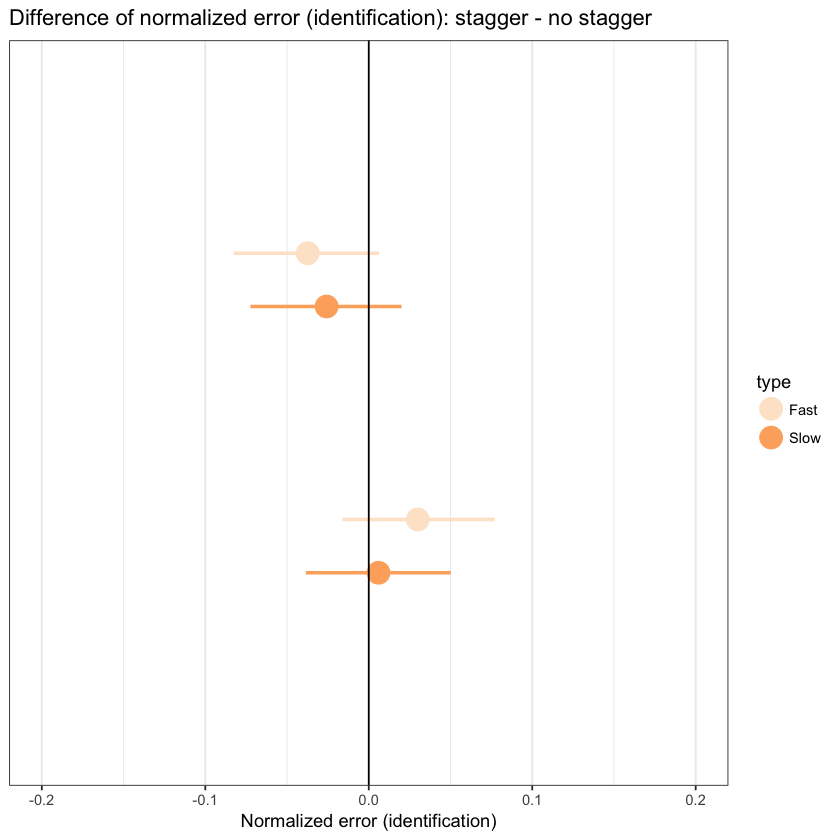

In [48]:
p1

In [49]:
#### Normalized error as if A

## P01
 data = read.csv(logsP01, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P01 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P01 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P01 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P01 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P01 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P01 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P01 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P01 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
 
## P02
data = read.csv(logsP02, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P02 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P02 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P02 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P02 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P02 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P02 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P02 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P02 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  
 ## P03
 data = read.csv(logsP03, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P03 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P03 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P03 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P03 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P03 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P03 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P03 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P03 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  ## P04
 data = read.csv(logsP04, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P04 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P04 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P04 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P04 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P04 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P04 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P04 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P04 <- on8$normalized_error_asifA - off8$normalized_error_asifA


## P05
 data = read.csv(logsP05, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P05 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P05 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P05 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P05 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P05 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P05 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P05 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P05 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
 
## P06
data = read.csv(logsP06, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P06 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P06 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P06 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P06 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P06 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P06 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P06 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P06 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  
 ## P07
 data = read.csv(logsP07, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P07 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P07 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P07 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P07 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P07 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P07 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P07 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P07 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  ## P08
 data = read.csv(logsP08, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P08 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P08 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P08 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P08 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P08 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P08 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P08 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P08 <- on8$normalized_error_asifA - off8$normalized_error_asifA


## P09
 data = read.csv(logsP09, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P09 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P09 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P09 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P09 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P09 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P09 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P09 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P09 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
 
## P10
data = read.csv(logsP10, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P10 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P10 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P10 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P10 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P10 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P10 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P10 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P10 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  
 ## P11
 data = read.csv(logsP11, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P11 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P11 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P11 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P11 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P11 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P11 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P11 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P11 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  ## P12
 data = read.csv(logsP12, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P12 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P12 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P12 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P12 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P12 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P12 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P12 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P12 <- on8$normalized_error_asifA - off8$normalized_error_asifA


## P13
 data = read.csv(logsP13, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P13 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P13 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P13 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P13 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P13 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P13 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P13 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P13 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
 
## P14
data = read.csv(logsP14, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P14 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P14 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P14 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P14 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P14 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P14 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P14 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P14 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  
 ## P15
 data = read.csv(logsP15, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
  diff1_P15 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P15 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P15 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P15 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P15 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P15 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P15 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P15 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
 ## P06
data = read.csv(logsP16, sep="\t", head=TRUE)
data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P16 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P16 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P16 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P16 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P16 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P16 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P16 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P16 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  
 ## P17
 data = read.csv(logsP17, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P17 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P17 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P17 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P17 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P17 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P17 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P17 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P17 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
  ## P18
 data = read.csv(logsP18, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P18 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P18 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P18 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P18 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P18 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P18 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P18 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P18 <- on8$normalized_error_asifA - off8$normalized_error_asifA


## P19
 data = read.csv(logsP19, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P19 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P19 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P19 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P19 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P19 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P19 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P19 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P19 <- on8$normalized_error_asifA - off8$normalized_error_asifA
 
 
 
## P20
data = read.csv(logsP20, sep="\t", head=TRUE)
data <- data[data$practice != 'true',]   ## Filter out practice trials

 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]
 
 diff1_P20 <- on1$normalized_error_asifA - off1$normalized_error_asifA
 diff2_P20 <- on2$normalized_error_asifA - off2$normalized_error_asifA
 diff3_P20 <- on3$normalized_error_asifA - off3$normalized_error_asifA
 diff4_P20 <- on4$normalized_error_asifA - off4$normalized_error_asifA
 diff5_P20 <- on5$normalized_error_asifA - off5$normalized_error_asifA
 diff6_P20 <- on6$normalized_error_asifA - off6$normalized_error_asifA
 diff7_P20 <- on7$normalized_error_asifA - off7$normalized_error_asifA
 diff8_P20 <- on8$normalized_error_asifA - off8$normalized_error_asifA

In [51]:
d1 <- c(diff1_P01, diff5_P01, 
        diff1_P02, diff5_P02, 
        diff1_P03, diff5_P03, 
        diff1_P04, diff5_P04, 
        diff1_P05, diff5_P05, 
        diff1_P06, diff5_P06, 
        diff1_P07, diff5_P07, 
        diff1_P08, diff5_P08, 
        diff1_P09, diff5_P09, 
        diff1_P10, diff5_P10, 
        diff1_P11, diff5_P11, 
        diff1_P12, diff5_P12, 
        diff1_P13, diff5_P13, 
        diff1_P14, diff5_P14, 
        diff1_P15, diff5_P15, 
        diff1_P16, diff5_P16, 
        diff1_P17, diff5_P17, 
        diff1_P18, diff5_P18, 
        diff1_P19, diff5_P19, 
        diff1_P20, diff5_P20)

d2 <- c(diff2_P01, diff6_P01, 
        diff2_P02, diff6_P02, 
        diff2_P03, diff6_P03, 
        diff2_P04, diff6_P04, 
        diff2_P05, diff6_P05, 
        diff2_P06, diff6_P06, 
        diff2_P07, diff6_P07, 
        diff2_P08, diff6_P08, 
        diff2_P09, diff6_P09, 
        diff2_P10, diff6_P10, 
        diff2_P11, diff6_P11, 
        diff2_P12, diff6_P12, 
        diff2_P13, diff6_P13, 
        diff2_P14, diff6_P14, 
        diff2_P15, diff6_P15,
        diff2_P16, diff6_P16, 
        diff2_P17, diff6_P17, 
        diff2_P18, diff6_P18, 
        diff2_P19, diff6_P19, 
        diff2_P20, diff6_P20)

d3 <- c(diff3_P01, diff7_P01, 
        diff3_P02, diff7_P02, 
        diff3_P03, diff7_P03, 
        diff3_P04, diff7_P04, 
        diff3_P05, diff7_P05, 
        diff3_P06, diff7_P06, 
        diff3_P07, diff7_P07, 
        diff3_P08, diff7_P08, 
        diff3_P09, diff7_P09, 
        diff3_P10, diff7_P10, 
        diff3_P11, diff7_P11, 
        diff3_P12, diff7_P12, 
        diff3_P13, diff7_P13, 
        diff3_P14, diff7_P14, 
        diff3_P15, diff7_P15,
        diff3_P16, diff7_P16, 
        diff3_P17, diff7_P17, 
        diff3_P18, diff7_P18, 
        diff3_P19, diff7_P19, 
        diff3_P20, diff7_P20)

d4 <- c(diff4_P01, diff8_P01, 
        diff4_P02, diff8_P02, 
        diff4_P03, diff8_P03, 
        diff4_P04, diff8_P04, 
        diff4_P05, diff8_P05, 
        diff4_P06, diff8_P06, 
        diff4_P07, diff8_P07, 
        diff4_P08, diff8_P08, 
        diff4_P09, diff8_P09, 
        diff4_P10, diff8_P10, 
        diff4_P11, diff8_P11, 
        diff4_P12, diff8_P12, 
        diff4_P13, diff8_P13, 
        diff4_P14, diff8_P14, 
        diff4_P15, diff8_P15,
        diff4_P16, diff8_P16, 
        diff4_P17, diff8_P17, 
        diff4_P18, diff8_P18, 
        diff4_P19, diff8_P19, 
        diff4_P20, diff8_P20)

In [52]:
points <- c(mean(d1), mean(d2), mean(d3), mean(d4))
lower_CIs <- c(getLowerCI(d1,'mean'), getLowerCI(d2,'mean'), getLowerCI(d3,'mean'), getLowerCI(d4,'mean'))
upper_CIs <- c(getUpperCI(d1,'mean'), getUpperCI(d2,'mean'), getUpperCI(d3,'mean'), getUpperCI(d4,'mean'))

dfr <- data.frame(         # data frame with f and CIs
    x = points,
    y = c("YOrder","YOrder","SmartOrder","SmartOrder"),
    upper = upper_CIs,
    lower = lower_CIs,
    type = c("Slow","Fast","Slow", "Fast")
)

dfr$y_numeric <- c(0.9,1.1,1.9,2.1)

p2 <- ggplot(dfr, aes(x, y_numeric, colour = type)) +
        geom_point(size = 6) +
        geom_errorbarh(aes(xmin=lower, xmax=upper), height = .0, size = 1) +
        scale_colour_brewer(palette=7) +
        coord_cartesian(xlim = c(-0.2, 0.2), ylim = c(0.7,2.3)) +
        scale_y_discrete(breaks=c(1,2), labels=c("YOrder","SmartOrder")) +
        xlab("Normalized error (selection)") +
        theme_bw() + 
        theme(axis.title.y = element_blank(), axis.line.y = element_blank()) +
        ggtitle("Difference of normalized error (selection): stagger - no stagger") +
        geom_vline(xintercept = 0)

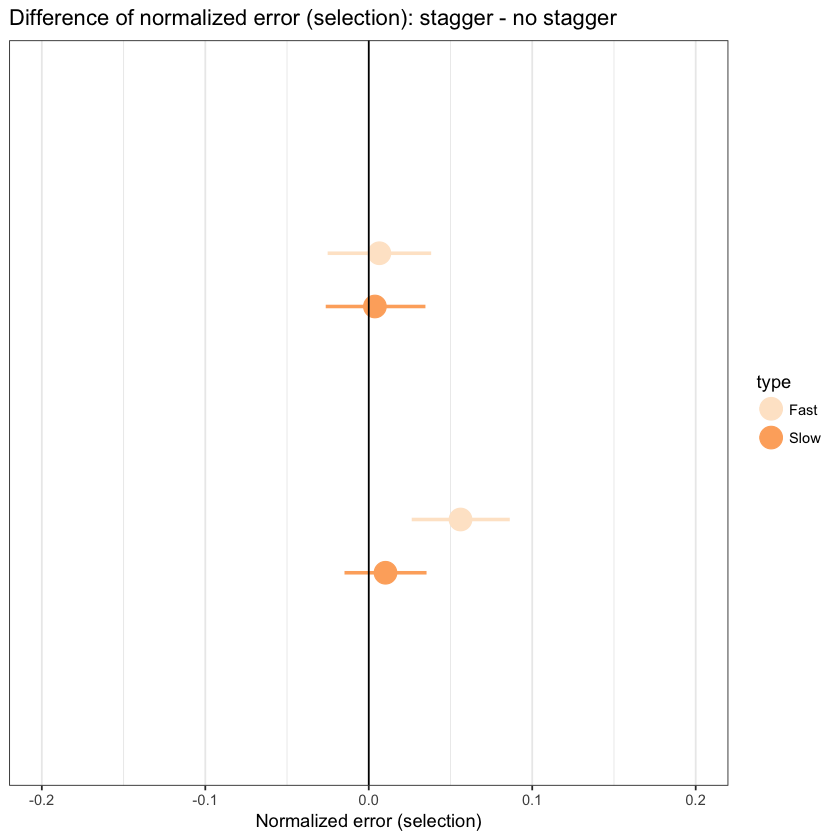

In [54]:
p2

In [55]:
##### ACCURACY

 ## P01
 data = read.csv(logsP01, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P01 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P01 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P01 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P01 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P01 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P01 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P01 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P01 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P02
 data = read.csv(logsP02, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P02 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P02 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P02 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P02 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P02 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P02 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P02 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P02 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P03
 data = read.csv(logsP03, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P03 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P03 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P03 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P03 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P03 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P03 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P03 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P03 <- on8$common_targets_percent - off8$common_targets_percent
 
 
 ## P04
 data = read.csv(logsP04, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P04 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P04 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P04 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P04 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P04 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P04 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P04 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P04 <- on8$common_targets_percent - off8$common_targets_percent
 
 
 ## P05
 data = read.csv(logsP05, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P05 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P05 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P05 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P05 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P05 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P05 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P05 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P05 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P06
 data = read.csv(logsP06, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P06 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P06 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P06 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P06 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P06 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P06 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P06 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P06 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P07
 data = read.csv(logsP07, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P07 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P07 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P07 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P07 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P07 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P07 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P07 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P07 <- on8$common_targets_percent - off8$common_targets_percent
 
 
 ## P08
 data = read.csv(logsP08, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P08 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P08 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P08 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P08 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P08 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P08 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P08 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P08 <- on8$common_targets_percent - off8$common_targets_percent
 
 ## P09
 data = read.csv(logsP09, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P09 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P09 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P09 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P09 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P09 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P09 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P09 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P09 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P10
 data = read.csv(logsP10, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P10 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P10 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P10 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P10 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P10 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P10 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P10 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P10 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P11
 data = read.csv(logsP11, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P11 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P11 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P11 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P11 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P11 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P11 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P11 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P11 <- on8$common_targets_percent - off8$common_targets_percent
 
 
 ## P12
 data = read.csv(logsP12, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P12 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P12 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P12 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P12 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P12 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P12 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P12 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P12 <- on8$common_targets_percent - off8$common_targets_percent
 
 ## P13
 data = read.csv(logsP13, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P13 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P13 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P13 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P13 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P13 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P13 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P13 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P13 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P14
 data = read.csv(logsP14, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P14 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P14 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P14 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P14 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P14 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P14 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P14 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P14 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P15
 data = read.csv(logsP15, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P15 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P15 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P15 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P15 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P15 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P15 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P15 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P15 <- on8$common_targets_percent - off8$common_targets_percent
 
  
  ## P16
 data = read.csv(logsP16, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P16 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P16 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P16 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P16 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P16 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P16 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P16 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P16 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P17
 data = read.csv(logsP17, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P17 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P17 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P17 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P17 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P17 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P17 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P17 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P17 <- on8$common_targets_percent - off8$common_targets_percent
 
 
 ## P18
 data = read.csv(logsP18, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P18 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P18 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P18 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P18 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P18 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P18 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P18 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P18 <- on8$common_targets_percent - off8$common_targets_percent
 
 ## P19
 data = read.csv(logsP19, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P19 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P19 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P19 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P19 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P19 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P19 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P19 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P19 <- on8$common_targets_percent - off8$common_targets_percent
 
  ## P20
 data = read.csv(logsP20, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P20 <- on1$common_targets_percent - off1$common_targets_percent
 diff2_P20 <- on2$common_targets_percent - off2$common_targets_percent
 diff3_P20 <- on3$common_targets_percent - off3$common_targets_percent
 diff4_P20 <- on4$common_targets_percent - off4$common_targets_percent
 diff5_P20 <- on5$common_targets_percent - off5$common_targets_percent
 diff6_P20 <- on6$common_targets_percent - off6$common_targets_percent
 diff7_P20 <- on7$common_targets_percent - off7$common_targets_percent
 diff8_P20 <- on8$common_targets_percent - off8$common_targets_percent

In [59]:
d1 <- c(diff1_P01, diff5_P01, 
        diff1_P02, diff5_P02, 
        diff1_P03, diff5_P03, 
        diff1_P04, diff5_P04, 
        diff1_P05, diff5_P05, 
        diff1_P06, diff5_P06, 
        diff1_P07, diff5_P07, 
        diff1_P08, diff5_P08, 
        diff1_P09, diff5_P09, 
        diff1_P10, diff5_P10, 
        diff1_P11, diff5_P11, 
        diff1_P12, diff5_P12, 
        diff1_P13, diff5_P13, 
        diff1_P14, diff5_P14, 
        diff1_P15, diff5_P15, 
        diff1_P16, diff5_P16, 
        diff1_P17, diff5_P17, 
        diff1_P18, diff5_P18, 
        diff1_P19, diff5_P19, 
        diff1_P20, diff5_P20)

d2 <- c(diff2_P01, diff6_P01, 
        diff2_P02, diff6_P02, 
        diff2_P03, diff6_P03, 
        diff2_P04, diff6_P04, 
        diff2_P05, diff6_P05, 
        diff2_P06, diff6_P06, 
        diff2_P07, diff6_P07, 
        diff2_P08, diff6_P08, 
        diff2_P09, diff6_P09, 
        diff2_P10, diff6_P10, 
        diff2_P11, diff6_P11, 
        diff2_P12, diff6_P12, 
        diff2_P13, diff6_P13, 
        diff2_P14, diff6_P14, 
        diff2_P15, diff6_P15,
        diff2_P16, diff6_P16, 
        diff2_P17, diff6_P17, 
        diff2_P18, diff6_P18, 
        diff2_P19, diff6_P19, 
        diff2_P20, diff6_P20)

d3 <- c(diff3_P01, diff7_P01, 
        diff3_P02, diff7_P02, 
        diff3_P03, diff7_P03, 
        diff3_P04, diff7_P04, 
        diff3_P05, diff7_P05, 
        diff3_P06, diff7_P06, 
        diff3_P07, diff7_P07, 
        diff3_P08, diff7_P08, 
        diff3_P09, diff7_P09, 
        diff3_P10, diff7_P10, 
        diff3_P11, diff7_P11, 
        diff3_P12, diff7_P12, 
        diff3_P13, diff7_P13, 
        diff3_P14, diff7_P14, 
        diff3_P15, diff7_P15,
        diff3_P16, diff7_P16, 
        diff3_P17, diff7_P17, 
        diff3_P18, diff7_P18, 
        diff3_P19, diff7_P19, 
        diff3_P20, diff7_P20)

d4 <- c(diff4_P01, diff8_P01, 
        diff4_P02, diff8_P02, 
        diff4_P03, diff8_P03, 
        diff4_P04, diff8_P04, 
        diff4_P05, diff8_P05, 
        diff4_P06, diff8_P06, 
        diff4_P07, diff8_P07, 
        diff4_P08, diff8_P08, 
        diff4_P09, diff8_P09, 
        diff4_P10, diff8_P10, 
        diff4_P11, diff8_P11, 
        diff4_P12, diff8_P12, 
        diff4_P13, diff8_P13, 
        diff4_P14, diff8_P14, 
        diff4_P15, diff8_P15,
        diff4_P16, diff8_P16, 
        diff4_P17, diff8_P17, 
        diff4_P18, diff8_P18, 
        diff4_P19, diff8_P19, 
        diff4_P20, diff8_P20)

In [61]:
points <- c(mean(d1), mean(d2), mean(d3), mean(d4))
lower_CIs <- c(getLowerCI(d1,'mean'), getLowerCI(d2,'mean'), getLowerCI(d3,'mean'), getLowerCI(d4,'mean'))
upper_CIs <- c(getUpperCI(d1,'mean'), getUpperCI(d2,'mean'), getUpperCI(d3,'mean'), getUpperCI(d4,'mean'))

dfr <- data.frame(         # data frame with f and CIs
    x = points,
    y = c("YOrder","YOrder","SmartOrder","SmartOrder"),
    upper = upper_CIs,
    lower = lower_CIs,
    type = c("Slow","Fast","Slow", "Fast")
)

dfr$y_numeric <- c(0.9,1.1,1.9,2.1)


p4 <- ggplot(dfr, aes(x, y_numeric, colour = type)) +
        geom_point(size = 6) +
        geom_errorbarh(aes(xmin=lower, xmax=upper), height = .0, size = 1) +
        scale_colour_brewer(palette=4) +
        coord_cartesian(xlim = c(-0.2, 0.2), ylim = c(0.7,2.3)) +
        scale_y_discrete(breaks=c(1,2), labels=c("YOrder","SmartOrder")) +
        scale_x_reverse() +
        xlab("Accuracy (correct selected / total targets)") +
        theme_bw() + 
        theme(axis.title.y = element_blank(), axis.line.y = element_blank()) +
        ggtitle("Difference of selection accuracy (staggered - no staggered)") +
        geom_vline(xintercept = 0)

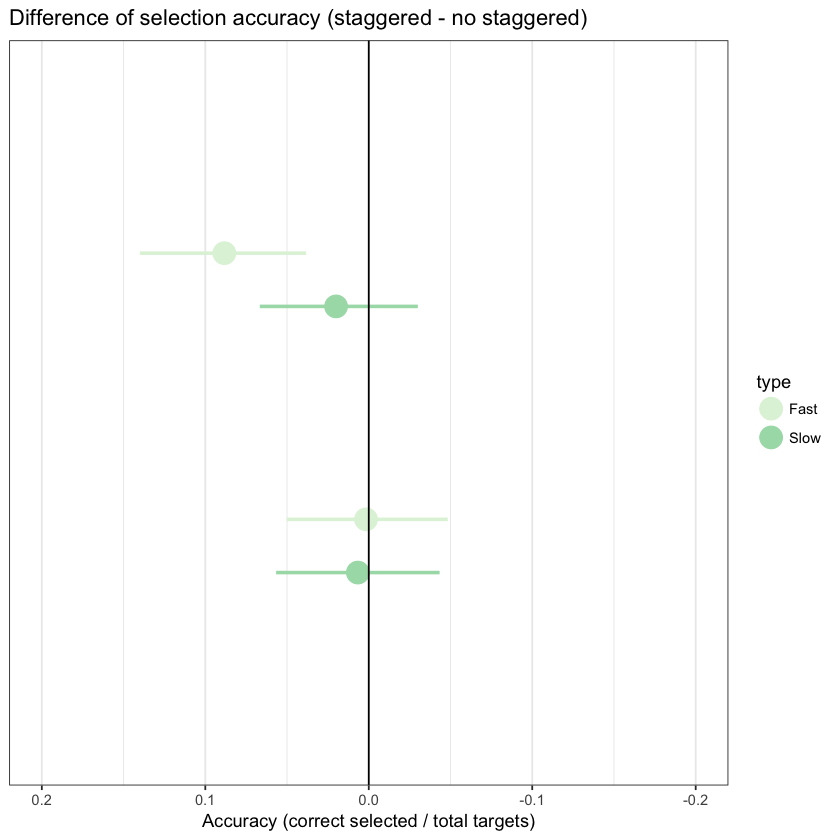

In [62]:
p4

In [64]:
##### ACCURACY

 ## P01
 data = read.csv(logsP01, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P01 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P01 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P01 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P01 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P01 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P01 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P01 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P01 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P02
 data = read.csv(logsP02, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P02 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P02 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P02 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P02 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P02 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P02 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P02 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P02 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P03
 data = read.csv(logsP03, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P03 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P03 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P03 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P03 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P03 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P03 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P03 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P03 <- on8$correct_targets_percent - off8$correct_targets_percent
 
 
 ## P04
 data = read.csv(logsP04, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P04 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P04 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P04 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P04 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P04 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P04 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P04 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P04 <- on8$correct_targets_percent - off8$correct_targets_percent
 
 
 ## P05
 data = read.csv(logsP05, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P05 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P05 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P05 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P05 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P05 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P05 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P05 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P05 <- on8$correct_targets_percent - off8$correct_targets_percent

  ## P06
 data = read.csv(logsP06, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P06 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P06 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P06 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P06 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P06 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P06 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P06 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P06 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P07
 data = read.csv(logsP07, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P07 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P07 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P07 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P07 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P07 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P07 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P07 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P07 <- on8$correct_targets_percent - off8$correct_targets_percent
 
 
 ## P08
 data = read.csv(logsP08, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P08 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P08 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P08 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P08 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P08 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P08 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P08 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P08 <- on8$correct_targets_percent - off8$correct_targets_percent
 

## P09
 data = read.csv(logsP09, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P09 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P09 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P09 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P09 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P09 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P09 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P09 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P09 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P10
 data = read.csv(logsP10, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P10 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P10 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P10 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P10 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P10 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P10 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P10 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P10 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P11
 data = read.csv(logsP11, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P11 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P11 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P11 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P11 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P11 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P11 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P11 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P11 <- on8$correct_targets_percent - off8$correct_targets_percent
 
 
 ## P12
 data = read.csv(logsP12, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P12 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P12 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P12 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P12 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P12 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P12 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P12 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P12 <- on8$correct_targets_percent - off8$correct_targets_percent
 

## P13
 data = read.csv(logsP13, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P13 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P13 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P13 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P13 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P13 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P13 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P13 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P13 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P14
 data = read.csv(logsP14, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P14 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P14 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P14 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P14 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P14 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P14 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P14 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P14 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P15
 data = read.csv(logsP15, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P15 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P15 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P15 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P15 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P15 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P15 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P15 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P15 <- on8$correct_targets_percent - off8$correct_targets_percent
 
 
   ## P16
 data = read.csv(logsP16, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P16 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P16 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P16 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P16 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P16 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P16 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P16 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P16 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P17
 data = read.csv(logsP17, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P17 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P17 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P17 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P17 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P17 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P17 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P17 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P17 <- on8$correct_targets_percent - off8$correct_targets_percent
 
 
 ## P18
 data = read.csv(logsP18, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P18 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P18 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P18 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P18 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P18 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P18 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P18 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P18 <- on8$correct_targets_percent - off8$correct_targets_percent
 

## P19
 data = read.csv(logsP19, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P19 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P19 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P19 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P19 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P19 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P19 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P19 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P19 <- on8$correct_targets_percent - off8$correct_targets_percent
 
  ## P20
 data = read.csv(logsP20, sep="\t", head=TRUE)
 data <- data[data$practice != 'true',]   ## Filter out practice trials



 off1 <- data[data$bloc_name == 'off1',]
 off2 <- data[data$bloc_name == 'off2',]
 off3 <- data[data$bloc_name == 'off3',]
 off4 <- data[data$bloc_name == 'off4',]
 off5 <- data[data$bloc_name == 'off5',]
 off6 <- data[data$bloc_name == 'off6',]
 off7 <- data[data$bloc_name == 'off7',]
 off8 <- data[data$bloc_name == 'off8',]
 on1 <- data[data$bloc_name == 'on1',]
 on2 <- data[data$bloc_name == 'on2',]
 on3 <- data[data$bloc_name == 'on3',]
 on4 <- data[data$bloc_name == 'on4',]
 on5 <- data[data$bloc_name == 'on5',]
 on6 <- data[data$bloc_name == 'on6',]
 on7 <- data[data$bloc_name == 'on7',]
 on8 <- data[data$bloc_name == 'on8',]

 diff1_P20 <- on1$correct_targets_percent - off1$correct_targets_percent
 diff2_P20 <- on2$correct_targets_percent - off2$correct_targets_percent
 diff3_P20 <- on3$correct_targets_percent - off3$correct_targets_percent
 diff4_P20 <- on4$correct_targets_percent - off4$correct_targets_percent
 diff5_P20 <- on5$correct_targets_percent - off5$correct_targets_percent
 diff6_P20 <- on6$correct_targets_percent - off6$correct_targets_percent
 diff7_P20 <- on7$correct_targets_percent - off7$correct_targets_percent
 diff8_P20 <- on8$correct_targets_percent - off8$correct_targets_percent

In [65]:
d1 <- c(diff1_P01, diff5_P01, 
        diff1_P02, diff5_P02, 
        diff1_P03, diff5_P03, 
        diff1_P04, diff5_P04, 
        diff1_P05, diff5_P05, 
        diff1_P06, diff5_P06, 
        diff1_P07, diff5_P07, 
        diff1_P08, diff5_P08, 
        diff1_P09, diff5_P09, 
        diff1_P10, diff5_P10, 
        diff1_P11, diff5_P11, 
        diff1_P12, diff5_P12, 
        diff1_P13, diff5_P13, 
        diff1_P14, diff5_P14, 
        diff1_P15, diff5_P15, 
        diff1_P16, diff5_P16, 
        diff1_P17, diff5_P17, 
        diff1_P18, diff5_P18, 
        diff1_P19, diff5_P19, 
        diff1_P20, diff5_P20)

d2 <- c(diff2_P01, diff6_P01, 
        diff2_P02, diff6_P02, 
        diff2_P03, diff6_P03, 
        diff2_P04, diff6_P04, 
        diff2_P05, diff6_P05, 
        diff2_P06, diff6_P06, 
        diff2_P07, diff6_P07, 
        diff2_P08, diff6_P08, 
        diff2_P09, diff6_P09, 
        diff2_P10, diff6_P10, 
        diff2_P11, diff6_P11, 
        diff2_P12, diff6_P12, 
        diff2_P13, diff6_P13, 
        diff2_P14, diff6_P14, 
        diff2_P15, diff6_P15,
        diff2_P16, diff6_P16, 
        diff2_P17, diff6_P17, 
        diff2_P18, diff6_P18, 
        diff2_P19, diff6_P19, 
        diff2_P20, diff6_P20)

d3 <- c(diff3_P01, diff7_P01, 
        diff3_P02, diff7_P02, 
        diff3_P03, diff7_P03, 
        diff3_P04, diff7_P04, 
        diff3_P05, diff7_P05, 
        diff3_P06, diff7_P06, 
        diff3_P07, diff7_P07, 
        diff3_P08, diff7_P08, 
        diff3_P09, diff7_P09, 
        diff3_P10, diff7_P10, 
        diff3_P11, diff7_P11, 
        diff3_P12, diff7_P12, 
        diff3_P13, diff7_P13, 
        diff3_P14, diff7_P14, 
        diff3_P15, diff7_P15,
        diff3_P16, diff7_P16, 
        diff3_P17, diff7_P17, 
        diff3_P18, diff7_P18, 
        diff3_P19, diff7_P19, 
        diff3_P20, diff7_P20)

d4 <- c(diff4_P01, diff8_P01, 
        diff4_P02, diff8_P02, 
        diff4_P03, diff8_P03, 
        diff4_P04, diff8_P04, 
        diff4_P05, diff8_P05, 
        diff4_P06, diff8_P06, 
        diff4_P07, diff8_P07, 
        diff4_P08, diff8_P08, 
        diff4_P09, diff8_P09, 
        diff4_P10, diff8_P10, 
        diff4_P11, diff8_P11, 
        diff4_P12, diff8_P12, 
        diff4_P13, diff8_P13, 
        diff4_P14, diff8_P14, 
        diff4_P15, diff8_P15,
        diff4_P16, diff8_P16, 
        diff4_P17, diff8_P17, 
        diff4_P18, diff8_P18, 
        diff4_P19, diff8_P19, 
        diff4_P20, diff8_P20)

In [66]:
points <- c(mean(d1), mean(d2), mean(d3), mean(d4))
lower_CIs <- c(getLowerCI(d1,'mean'), getLowerCI(d2,'mean'), getLowerCI(d3,'mean'), getLowerCI(d4,'mean'))
upper_CIs <- c(getUpperCI(d1,'mean'), getUpperCI(d2,'mean'), getUpperCI(d3,'mean'), getUpperCI(d4,'mean'))

dfr <- data.frame(         # data frame with f and CIs
    x = points,
    y = c("YOrder","YOrder","SmartOrder","SmartOrder"),
    upper = upper_CIs,
    lower = lower_CIs,
    type = c("Slow","Fast","Slow", "Fast")
)

dfr$y_numeric <- c(0.9,1.1,1.9,2.1)


p3 <- ggplot(dfr, aes(x, y_numeric, colour = type)) +
        geom_point(size = 6) +
        geom_errorbarh(aes(xmin=lower, xmax=upper), height = .0, size = 1) +
        scale_colour_brewer(palette=4) +
        coord_cartesian(xlim = c(-0.2, 0.2), ylim = c(0.7,2.3)) +
        scale_y_discrete(breaks=c(1,2), labels=c("YOrder","SmartOrder")) +
        scale_x_reverse() +
        xlab("Accuracy (correct identified / total targets)") +
        theme_bw() + 
        theme(axis.title.y = element_blank(), axis.line.y = element_blank()) +
        ggtitle("Difference of identification accuracy (staggered - no staggered)") +
        geom_vline(xintercept = 0)

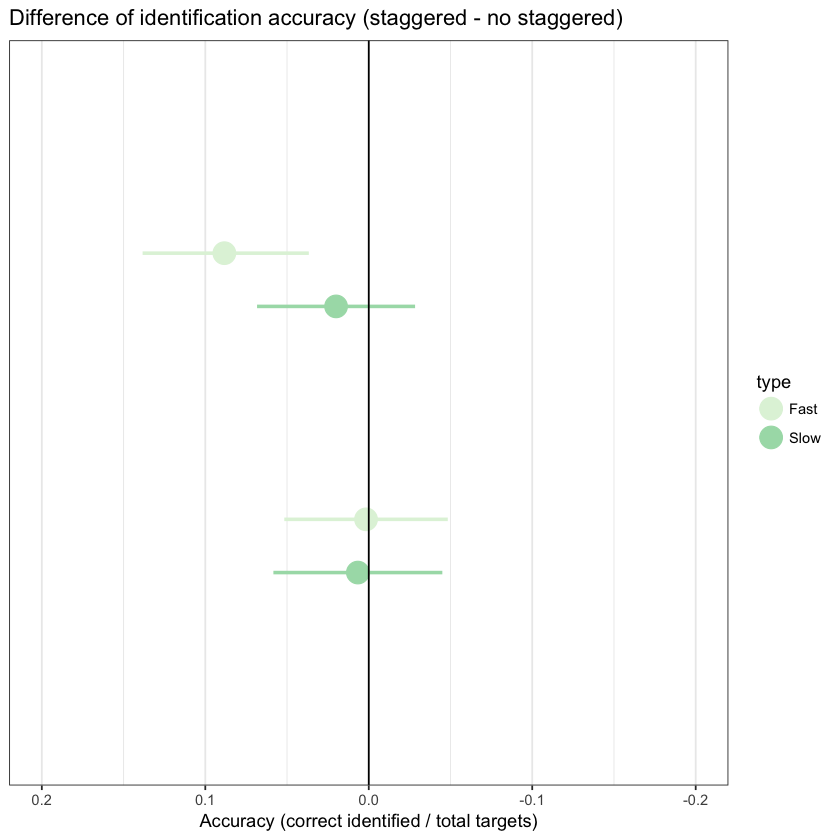

In [68]:
p3

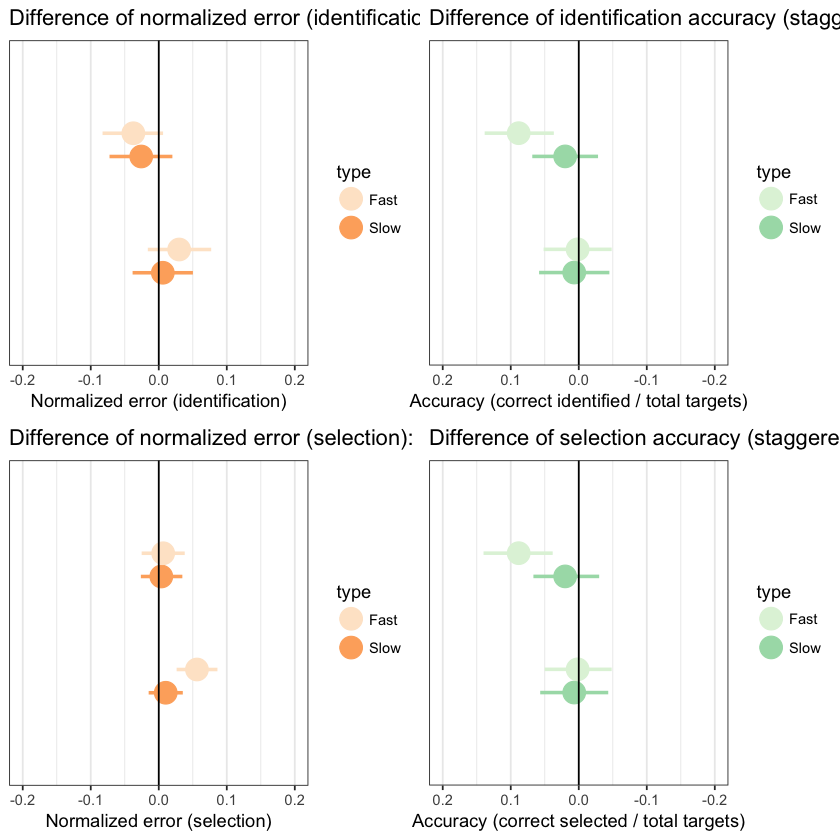

In [69]:
##### SUMMARY OF ALL PLOTS ######
grid.arrange(p1,p3,p2,p4, ncol=2)